In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
from sqlalchemy import func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
Base = automap_base()
Base.prepare(engine, reflect=True)

Measurement = Base.classes.measurement
Station = Base.classes.station

session = Session(engine)

In [6]:
class_names = Base.classes.keys()
print(class_names)


['measurement', 'station']


In [7]:
Measurement = Base.classes.measurement
Station = Base.classes.station


In [8]:
SM = sessionmaker(bind=engine)
S = Session()

# Exploratory Precipitation Analysis

In [9]:
mrd = session.query(func.max(Measurement.date)).scalar()
print(mrd)



2017-08-23


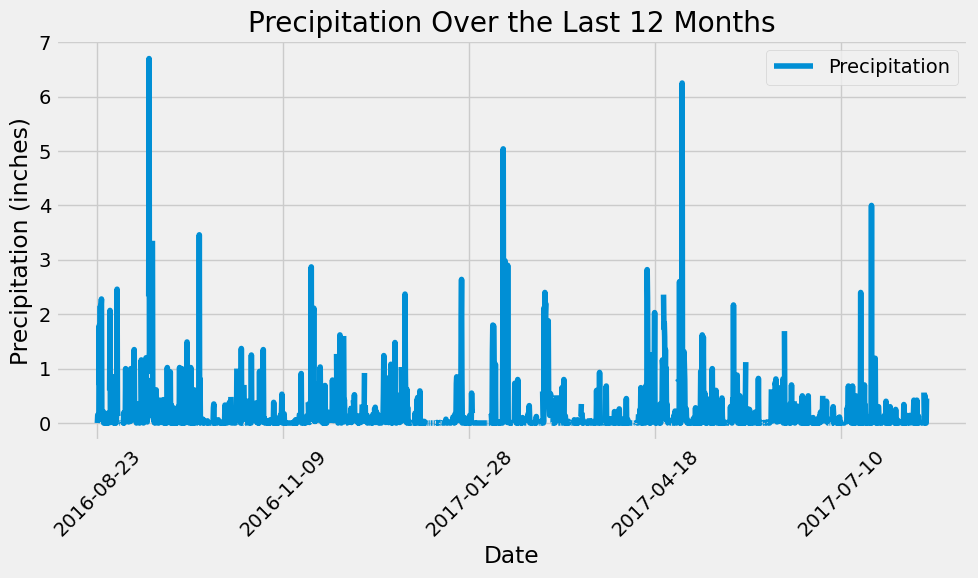

In [10]:
ld = session.query(func.max(Measurement.date)).scalar()
oya = (pd.to_datetime(ld) - pd.DateOffset(years=1)).strftime('%Y-%m-%d')
results = session.query(Measurement.date, Measurement.prcp)\
                  .filter(Measurement.date >= oya)\
                  .order_by(Measurement.date).all()
df = pd.DataFrame(results, columns=['Date', 'Precipitation'])
df = df.sort_values(by='Date')
df.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.xlabel("Date")
plt.ylabel("Precipitation (inches)")
plt.title("Precipitation Over the Last 12 Months")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [11]:
stats = df['Precipitation'].describe()
display(stats)



count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

# Exploratory Station Analysis

In [12]:
stations = session.query(func.count(Station.station)).scalar()
print("Total number of stations:", stations)


Total number of stations: 9


In [13]:
astations = session.query(Measurement.station, func.count(Measurement.station))\
                         .group_by(Measurement.station)\
                         .order_by(func.count(Measurement.station).desc())\
                         .all()

for station, count in astations:
    print(f"Station: {station}, Count: {count}")


Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [14]:
mastation = astations[0][0]

temps = session.query(func.min(Measurement.tobs),
                                  func.max(Measurement.tobs),
                                  func.avg(Measurement.tobs))\
                           .filter(Measurement.station == mastation)\
                           .all()

print(f"Most Active Station: {mastation}")
print(f"Lowest Temperature: {temps[0][0]}")
print(f"Highest Temperature: {temps[0][1]}")
print(f"Average Temperature: {temps[0][2]}")


Most Active Station: USC00519281
Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


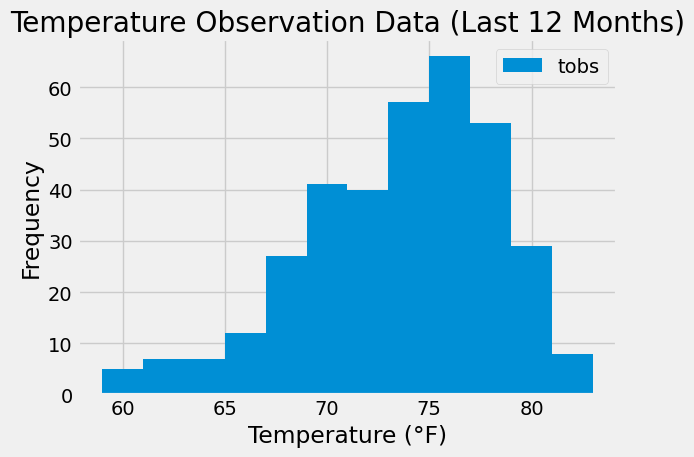

In [15]:
tdata = session.query(Measurement.tobs)\
                          .filter(Measurement.station == mastation)\
                          .filter(Measurement.date >= oya)\
                          .all()

temp = [temp[0] for temp in tdata]

plt.hist(temp, bins=12)
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.title('Temperature Observation Data (Last 12 Months)')
plt.legend(['tobs'], loc='upper right')
plt.tight_layout()
plt.show()


# Close Session

In [16]:
# Close Session
session.close()